# Monitoramento temporal dos canais

In [1]:
import pandas as pd
import numpy as np
import numpy.matlib 
import matplotlib.pyplot as plt

# Carrega arquivos

In [5]:
df_target  = pd.read_parquet('Dados_op.parq')
df_veto    = pd.read_parquet('Dados_op_veto.parq')

# Váriaveis padrões

In [6]:
col_a = ['PMT01','PMT02','PMT03', 'PMT04','PMT05','PMT06','PMT07','PMT08','PMT09','PMT10',
         'PMT11','PMT12','PMT13', 'PMT14','PMT15','PMT16','PMT17','PMT18','PMT19','PMT20',
         'PMT21','PMT22','PMT23', 'PMT24','PMT25','PMT26','PMT27','PMT28','PMT29','PMT30',
         'PMT31','PMT32']

col_as = ['PMT01s','PMT02s','PMT03s','PMT04s','PMT05s','PMT06s','PMT07s','PMT08s','PMT09s','PMT10s',
          'PMT11s','PMT12s','PMT13s','PMT14s','PMT15s','PMT16s','PMT17s','PMT18s','PMT19s','PMT20s',
          'PMT21s','PMT22s','PMT23s','PMT24s','PMT25s','PMT26s','PMT27s','PMT28s','PMT29s','PMT30s',
          'PMT31s','PMT32s']

col_b = ['PMT01_p','PMT02_p','PMT03_p', 'PMT04_p','PMT05_p','PMT06_p','PMT07_p','PMT08_p','PMT09_p','PMT10_p',
         'PMT11_p','PMT12_p','PMT13_p','PMT14_p','PMT15_p','PMT16_p','PMT17_p','PMT18_p','PMT19_p','PMT20_p',
         'PMT21_p','PMT22_p','PMT23_p','PMT24_p','PMT25_p','PMT26_p','PMT27_p','PMT28_p','PMT29_p','PMT30_p',
         'PMT31_p','PMT32_p']

col_bs = ['PMT01_ps','PMT02_ps','PMT03_ps','PMT04_ps','PMT05_ps','PMT06_ps','PMT07_ps','PMT08_ps','PMT09_ps','PMT10_ps',
          'PMT11_ps','PMT12_ps','PMT13_ps','PMT14_ps','PMT15_ps','PMT16_ps','PMT17_ps','PMT18_ps','PMT19_ps','PMT20_ps',
          'PMT21_ps','PMT22_ps','PMT23_ps','PMT24_ps','PMT25_ps','PMT26_ps','PMT27_ps','PMT28_ps','PMT29_ps','PMT30_ps',
          'PMT31_ps','PMT32_ps']

col_c = ['PMT01_m','PMT02_m','PMT03_m','PMT04_m','PMT05_m','PMT06_m','PMT07_m','PMT08_m','PMT09_m','PMT10_m',
         'PMT11_m','PMT12_m','PMT13_m','PMT14_m','PMT15_m','PMT16_m','PMT17_m','PMT18_m','PMT19_m','PMT20_m',
         'PMT21_m','PMT22_m','PMT23_m','PMT24_m','PMT25_m','PMT26_m','PMT27_m','PMT28_m','PMT29_m','PMT30_m',
         'PMT31_m','PMT32_m']

col_cs = ['PMT01_ms','PMT02_ms','PMT03_ms','PMT04_ms','PMT05_ms','PMT06_ms','PMT07_ms','PMT08_ms','PMT09_ms','PMT10_ms',
         'PMT11_ms','PMT12_ms','PMT13_ms','PMT14_ms','PMT15_ms','PMT16_ms','PMT17_ms','PMT18_ms','PMT19_ms','PMT20_ms',
         'PMT21_ms','PMT22_ms','PMT23_ms','PMT24_ms','PMT25_ms','PMT26_ms','PMT27_ms','PMT28_ms','PMT29_ms','PMT30_ms',
         'PMT31_ms','PMT32_ms']

In [7]:
col_av = ['PMT33','PMT34','PMT35','PMT36', 'PMT37','PMT38','PMT39','PMT40']

col_asv = ['PMT33s','PMT34s','PMT35s','PMT36s','PMT37s','PMT38s','PMT39s','PMT40s']

col_bv = ['PMT33_p','PMT34_p','PMT35_p','PMT36_p','PMT37_p','PMT38_p','PMT39_p','PMT40_p']

col_bsv = ['PMT33_ps','PMT34_ps','PMT35_ps','PMT36_ps','PMT37_ps','PMT38_ps','PMT39_ps','PMT40_ps']

col_cv = ['PMT33_m','PMT34_m','PMT35_m','PMT36_m','PMT37_m','PMT38_m','PMT39_m','PMT40_m']

col_csv = ['PMT33_ms','PMT34_ms', 'PMT35_ms','PMT36_ms','PMT37_ms','PMT38_ms', 'PMT39_ms','PMT40_ms']

In [8]:
suport = np.arange(df_target.shape[0])

In [10]:
x_data = [suport[df_target['Timestamp'] == '2019-01-01'],suport[df_target['Timestamp'] == '2019-02-01'],
          suport[df_target['Timestamp'] == '2019-03-01'],suport[df_target['Timestamp'] == '2019-04-01'],
          suport[df_target['Timestamp'] == '2019-05-01'],suport[df_target['Timestamp'] == '2019-06-01'],
          suport[df_target['Timestamp'] == '2019-07-01'],suport[df_target['Timestamp'] == '2019-08-01'],
          suport[df_target['Timestamp'] == '2019-09-01']]

# Amplitude

# 2 NDAQs

In [12]:
def plot_target(df,pont,ponts,x_data,ind):
    plt.rc('xtick', labelsize=14) 
    plt.rc('ytick', labelsize=14)
    plt.figure(figsize=(18,22))
    for i in ind:
            #print(i)
            plt.subplot(4,2,1 + i*2)
            plt.fill_between(np.arange(df.shape[0]), 10, 70,df['Funcionamento'] == 'Manutenção', color = 'red', alpha = 0.2, label = 'Manutenção') 
            plt.fill_between(np.arange(df.shape[0]), 10, 70,df['Funcionamento'] == 'Usina off', color = 'green', alpha = 0.2, label = 'Usina off') 
            plt.fill_between(np.arange(df.shape[0]), 10, 70,df['Funcionamento'] == 'On', color = 'yellow', alpha = 0.2, label = 'Usina On') 

            plt.plot(df[pont[0 + 8*i]],marker='o',markersize=5,color = 'red',linestyle = 'none',label = 'canal 1')
            plt.plot(df[pont[1 + 8*i]],marker='s', markersize=5,color = 'red',linestyle = 'none',label = 'canal 2')
            plt.plot(df[pont[2 + 8*i]],marker='^', markersize=5,color = 'blue',linestyle = 'none',label = 'canal 3')
            plt.plot(df[pont[3 + 8*i]],marker='D', markersize=5,color = 'blue',linestyle = 'none',label = 'canal 4')
            plt.plot(df[pont[4 + 8*i]],marker='o', markersize=5,markerfacecolor='none',color = 'black',linestyle = 'none',label = 'canal 5')
            plt.plot(df[pont[5 + 8*i]],marker='s',markersize=5,markerfacecolor='none',color = 'black',linestyle = 'none',label = 'canal 6')
            plt.plot(df[pont[6 + 8*i]],marker='^',markersize=5,markerfacecolor='none',color = 'orange',linestyle = 'none',label = 'canal 7')
            plt.plot(df[pont[7 + 8*i]],marker='D', markersize=5,markerfacecolor='none',color = 'orange',linestyle = 'none',label = 'canal 8')

            ax = plt.gca()
            ax.set_xticks(x_data)
            plt.xlim(-1,len(df[col_a[0]]))
            plt.ylim(10,70)
            ax.set_xticklabels(['01/01','01/02','01/03', '01/04','01/05','01/06','01/07','01/08','01/09'])
            plt.grid(linestyle='--', linewidth=1)
            if i == 0:
                plt.legend(loc="upper left", bbox_to_anchor=[0.27, 1],ncol=3, shadow=True, fancybox=True, fontsize = 12)
            plt.ylabel('Amplitude [ADC]', size=16)
            plt.xlabel('Data', size=16)


            plt.subplot(4,2,2 + i*2)
            plt.fill_between(np.arange(df.shape[0]), 30, 70,df['Funcionamento'] == 'Manutenção', color = 'red', alpha = 0.2, label = 'Manutenção') 
            plt.fill_between(np.arange(df.shape[0]), 30, 70,df['Funcionamento'] == 'Usina off', color = 'green', alpha = 0.2, label = 'Usina off') 
            plt.fill_between(np.arange(df.shape[0]), 30, 70,df['Funcionamento'] == 'On', color = 'yellow', alpha = 0.2, label = 'Usina On') 

            plt.plot(df[ponts[0 + 8*i]],marker='o',markersize=5,color = 'red',linestyle = 'none',label = 'canal 1')
            plt.plot(df[ponts[1 + 8*i]],marker='s', markersize=5,color = 'red',linestyle = 'none',label = 'canal 2')
            plt.plot(df[ponts[2 + 8*i]],marker='^', markersize=5,color = 'blue',linestyle = 'none',label = 'canal 3')
            plt.plot(df[ponts[3 + 8*i]],marker='D', markersize=5,color = 'blue',linestyle = 'none',label = 'canal 4')
            plt.plot(df[ponts[4 + 8*i]],marker='o', markersize=5,markerfacecolor='none',color = 'black',linestyle = 'none',label = 'canal 5')
            plt.plot(df[ponts[5 + 8*i]],marker='s',markersize=5,markerfacecolor='none',color = 'black',linestyle = 'none',label = 'canal 6')
            plt.plot(df[ponts[6 + 8*i]],marker='^',markersize=5,markerfacecolor='none',color = 'orange',linestyle = 'none',label = 'canal 7')
            plt.plot(df[ponts[7 + 8*i]],marker='D', markersize=5,markerfacecolor='none',color = 'orange',linestyle = 'none',label = 'canal 8')

            ax = plt.gca()
            ax.set_xticks(x_data)
            plt.xlim(-1,len(df[pont[0]]))
            plt.ylim(30,70)
            ax.set_xticklabels(['01/01','01/02','01/03', '01/04','01/05','01/06','01/07','01/08','01/09'])
            plt.grid(linestyle='--', linewidth=1)
            plt.ylabel('STD [ADC]', size=16)
            plt.xlabel('Data', size=16)

        #plt.show()

### NDAQ 6 e 10

Ammplitude

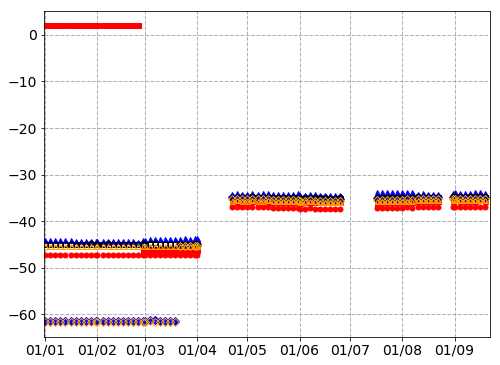

In [24]:
i = 0

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)
plt.figure(figsize=(8,6))
plt.plot(df_veto[col_bv[0 + 8*i]],marker='o',markersize=5,color = 'red',linestyle = 'none',label = 'canal 1')
plt.plot(df_veto[col_bv[1 + 8*i]],marker='s', markersize=5,color = 'red',linestyle = 'none',label = 'canal 2')
plt.plot(df_veto[col_bv[2 + 8*i]],marker='^', markersize=5,color = 'blue',linestyle = 'none',label = 'canal 3')
plt.plot(df_veto[col_bv[3 + 8*i]],marker='D', markersize=5,color = 'blue',linestyle = 'none',label = 'canal 4')
plt.plot(df_veto[col_bv[4 + 8*i]],marker='o', markersize=5,markerfacecolor='none',color = 'black',linestyle = 'none',label = 'canal 5')
plt.plot(df_veto[col_bv[5 + 8*i]],marker='s',markersize=5,markerfacecolor='none',color = 'black',linestyle = 'none',label = 'canal 6')
plt.plot(df_veto[col_bv[6 + 8*i]],marker='^',markersize=5,markerfacecolor='none',color = 'orange',linestyle = 'none',label = 'canal 7')
plt.plot(df_veto[col_bv[7 + 8*i]],marker='D', markersize=5,markerfacecolor='none',color = 'orange',linestyle = 'none',label = 'canal 8')



ax = plt.gca()
ax.set_xticks(x_data)
plt.xlim(-1,len(df_veto[col_av[0]]))
#plt.ylim(10,70)
ax.set_xticklabels(['01/01','01/02','01/03', '01/04','01/05','01/06','01/07','01/08','01/09'])
plt.grid(linestyle='--', linewidth=1)

# NDAQ 12 e 14

Ammplitude

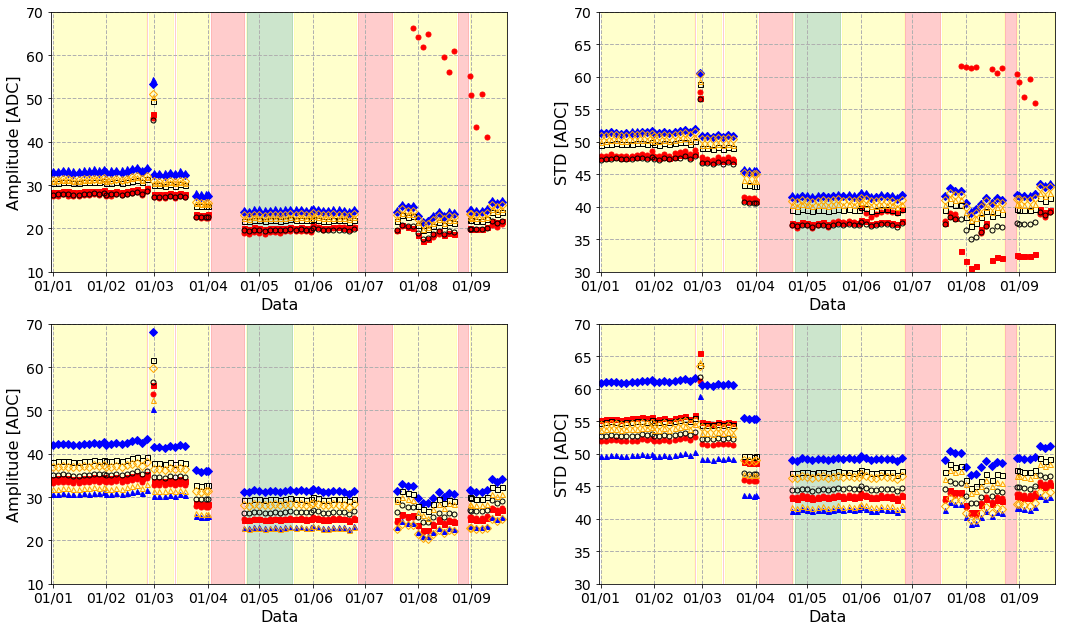

In [14]:
plot_target(df_target,col_a,col_as,x_data,np.arange(2,4))

# NDAQ 16

amplitude

In [18]:
df_veto

,PMT33,PMT34,PMT35,PMT36,PMT37,PMT38,PMT39,PMT40,PMT33s,PMT34s,...,PMT33_ms,PMT34_ms,PMT35_ms,PMT36_ms,PMT37_ms,PMT38_ms,PMT39_ms,PMT40_ms,Timestamp,Funcionamento
0,0.850830,0.529100,0.503296,0.882453,0.438295,0.332475,0.659832,0.693683,2.486115,0.507298,...,12.557169,7.012660,9.434087,13.264439,8.680383,6.391354,9.868976,12.631862,2019-01-01,On
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-02,On
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-03,On
3,0.842959,0.527862,0.496525,0.873047,0.414108,0.316223,0.672015,0.685628,2.428719,0.506499,...,12.434465,6.985359,9.286454,13.322647,8.183200,5.942763,10.209826,12.590586,2019-01-04,On
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-05,On
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-06,On
6,0.839976,0.547361,0.508528,0.880920,0.411242,0.316544,0.676609,0.687719,2.445914,0.504451,...,12.372521,7.446344,9.571928,13.467727,8.086063,6.019991,10.211186,12.611566,2019-01-07,On
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-08,On
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-09,On
9,0.836887,0.549589,0.501417,0.873613,0.429565,0.321691,0.667072,0.690066,2.314429,0.504978,...,12.403693,7.530723,9.484606,13.270147,8.540796,6.208464,10.000158,12.686681,2019-01-10,On


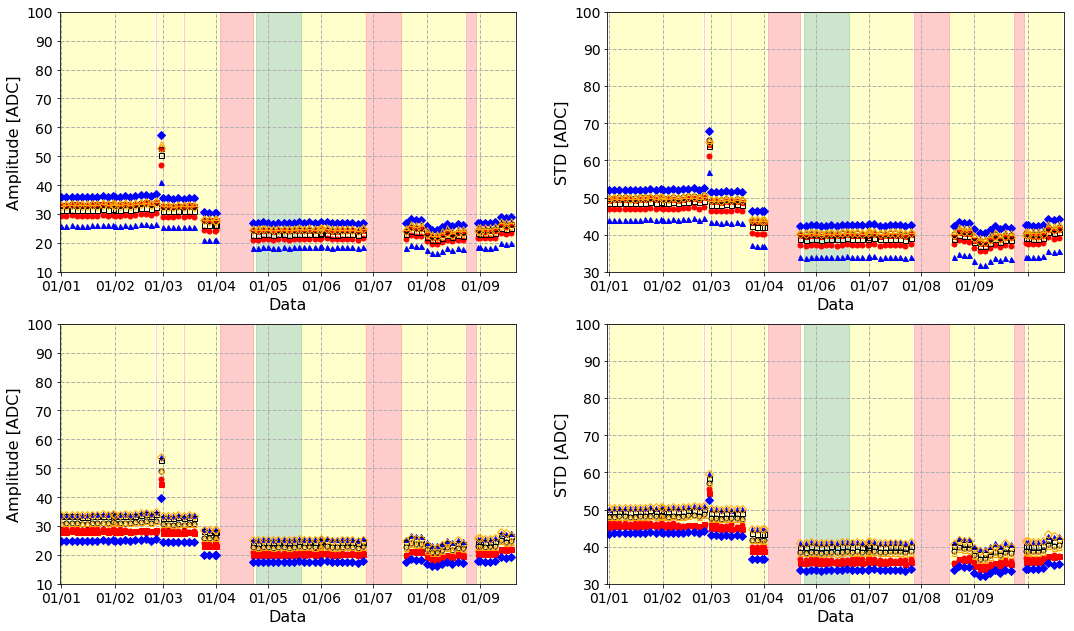

In [8]:
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)
plt.figure(figsize=(18,22))
for i in range(2):
        plt.subplot(4,2,1 + i*2)
        plt.fill_between(np.arange(df.shape[0]), 10, 100,df['Funcionamento'] == 'Manutenção', color = 'red', alpha = 0.2, label = 'Manutenção') 
        plt.fill_between(np.arange(df.shape[0]), 10, 100,df['Funcionamento'] == 'Usina off', color = 'green', alpha = 0.2, label = 'Usina off') 
        plt.fill_between(np.arange(df.shape[0]), 10, 100,df['Funcionamento'] == 'On', color = 'yellow', alpha = 0.2, label = 'Usina On') 

        plt.plot(df[col_a[0 + 8*i]],marker='o',markersize=5,color = 'red',linestyle = 'none',label = 'canal 1')
        plt.plot(df[col_a[1 + 8*i]],marker='s', markersize=5,color = 'red',linestyle = 'none',label = 'canal 2')
        plt.plot(df[col_a[2 + 8*i]],marker='^', markersize=5,color = 'blue',linestyle = 'none',label = 'canal 3')
        plt.plot(df[col_a[3 + 8*i]],marker='D', markersize=5,color = 'blue',linestyle = 'none',label = 'canal 4')
        plt.plot(df[col_a[4 + 8*i]],marker='o', markersize=5,markerfacecolor='none',color = 'black',linestyle = 'none',label = 'canal 5')
        plt.plot(df[col_a[5 + 8*i]],marker='s',markersize=5,markerfacecolor='none',color = 'black',linestyle = 'none',label = 'canal 6')
        plt.plot(df[col_a[6 + 8*i]],marker='^',markersize=5,markerfacecolor='none',color = 'orange',linestyle = 'none',label = 'canal 7')
        plt.plot(df[col_a[7 + 8*i]],marker='D', markersize=5,markerfacecolor='none',color = 'orange',linestyle = 'none',label = 'canal 8')

        ax = plt.gca()
        ax.set_xticks(x_data)
        plt.xlim(-1,len(df[col_a[0]]))
        plt.ylim(10,100)
        ax.set_xticklabels(['01/01','01/02','01/03', '01/04','01/05','01/06','01/07','01/08','01/09'])
        plt.grid(linestyle='--', linewidth=1)
        if i == 2:
            plt.legend(loc="upper right",bbox_to_anchor=[1, 1],ncol=3, shadow=True, fancybox=True, fontsize = 12)
        plt.ylabel('Amplitude [ADC]', size=16)
        plt.xlabel('Data', size=16)

        
        plt.subplot(4,2,2 + i*2)
        plt.fill_between(np.arange(df.shape[0]), 30, 100,df['Funcionamento'] == 'Manutenção', color = 'red', alpha = 0.2, label = 'Manutenção') 
        plt.fill_between(np.arange(df.shape[0]), 30, 100,df['Funcionamento'] == 'Usina off', color = 'green', alpha = 0.2, label = 'Usina off') 
        plt.fill_between(np.arange(df.shape[0]), 30, 100,df['Funcionamento'] == 'On', color = 'yellow', alpha = 0.2, label = 'Usina On') 

        plt.plot(df[col_as[0 + 8*i]],marker='o',markersize=5,color = 'red',linestyle = 'none',label = 'canal 1')
        plt.plot(df[col_as[1 + 8*i]],marker='s', markersize=5,color = 'red',linestyle = 'none',label = 'canal 2')
        plt.plot(df[col_as[2 + 8*i]],marker='^', markersize=5,color = 'blue',linestyle = 'none',label = 'canal 3')
        plt.plot(df[col_as[3 + 8*i]],marker='D', markersize=5,color = 'blue',linestyle = 'none',label = 'canal 4')
        plt.plot(df[col_as[4 + 8*i]],marker='o', markersize=5,markerfacecolor='none',color = 'black',linestyle = 'none',label = 'canal 5')
        plt.plot(df[col_as[5 + 8*i]],marker='s',markersize=5,markerfacecolor='none',color = 'black',linestyle = 'none',label = 'canal 6')
        plt.plot(df[col_as[6 + 8*i]],marker='^',markersize=5,markerfacecolor='none',color = 'orange',linestyle = 'none',label = 'canal 7')
        plt.plot(df[col_as[7 + 8*i]],marker='D', markersize=5,markerfacecolor='none',color = 'orange',linestyle = 'none',label = 'canal 8')

        ax = plt.gca()
        ax.set_xticks(x_data)
        plt.xlim(-1,len(df[col_a[0]]))
        plt.ylim(30,100)
        ax.set_xticklabels(['01/01','01/02','01/03', '01/04','01/06','01/07','01/08','01/09'])
        plt.grid(linestyle='--', linewidth=1)
        plt.ylabel('STD [ADC]', size=16)
        plt.xlabel('Data', size=16)

        #plt.show()

# Pedestal 

## duas NDAQs

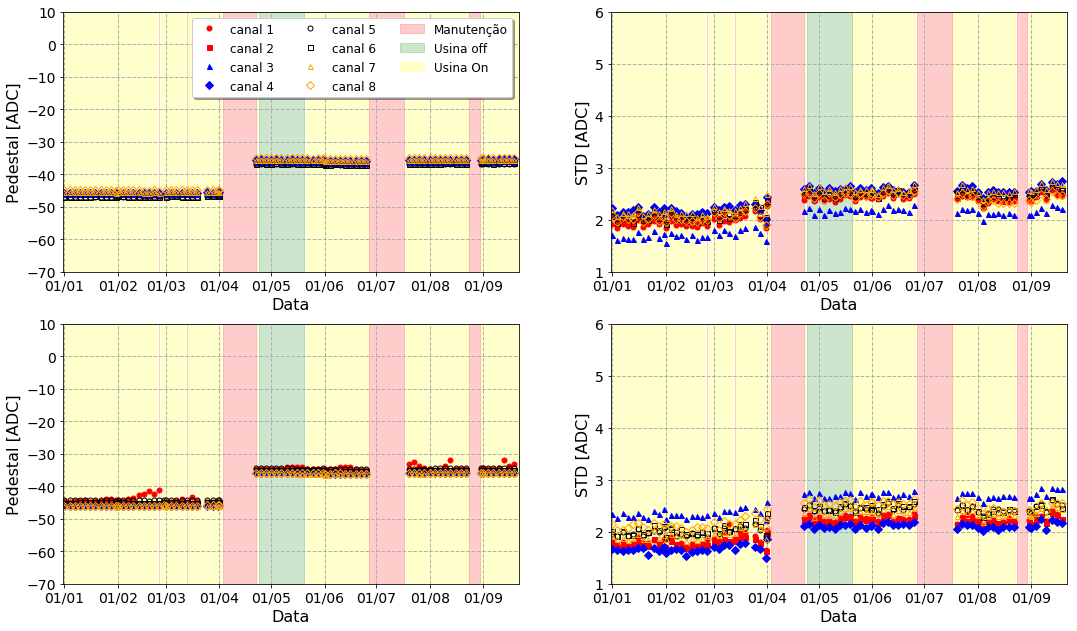

In [9]:
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)
plt.figure(figsize=(18,22))
for i in range(2):
       # print(i)
        plt.subplot(4,2,1 + i*2)
        plt.fill_between(np.arange(df.shape[0]),-70, 10,df['Funcionamento'] == 'Manutenção', color = 'red', alpha = 0.2, label = 'Manutenção') 
        plt.fill_between(np.arange(df.shape[0]),-70, 10,df['Funcionamento'] == 'Usina off', color = 'green', alpha = 0.2, label = 'Usina off') 
        plt.fill_between(np.arange(df.shape[0]),-70, 10,df['Funcionamento'] == 'On', color = 'yellow', alpha = 0.2, label = 'Usina On') 

        plt.plot(df[col_b[0 + 8*i]],marker='o',markersize=5,color = 'red',linestyle = 'none',label = 'canal 1')
        plt.plot(df[col_b[1 + 8*i]],marker='s', markersize=5,color = 'red',linestyle = 'none',label = 'canal 2')
        plt.plot(df[col_b[2 + 8*i]],marker='^', markersize=5,color = 'blue',linestyle = 'none',label = 'canal 3')
        plt.plot(df[col_b[3 + 8*i]],marker='D', markersize=5,color = 'blue',linestyle = 'none',label = 'canal 4')
        plt.plot(df[col_b[4 + 8*i]],marker='o', markersize=5,markerfacecolor='none',color = 'black',linestyle = 'none',label = 'canal 5')
        plt.plot(df[col_b[5 + 8*i]],marker='s',markersize=5,markerfacecolor='none',color = 'black',linestyle = 'none',label = 'canal 6')
        plt.plot(df[col_b[6 + 8*i]],marker='^',markersize=5,markerfacecolor='none',color = 'orange',linestyle = 'none',label = 'canal 7')
        plt.plot(df[col_b[7 + 8*i]],marker='D', markersize=5,markerfacecolor='none',color = 'orange',linestyle = 'none',label = 'canal 8')

        ax = plt.gca()
        ax.set_xticks(x_data)
        plt.xlim(-1,len(df[col_a[0]]))
        plt.ylim(-70,10)
        ax.set_xticklabels(['01/01','01/02','01/03', '01/04','01/05','01/06','01/07','01/08','01/09'])
        plt.grid(linestyle='--', linewidth=1)
        if i == 0:
            plt.legend(loc="upper left", bbox_to_anchor=[0.27, 1],ncol=3, shadow=True, fancybox=True, fontsize = 12)
        plt.ylabel('Pedestal [ADC]', size=16)
        plt.xlabel('Data', size=16)

        
        plt.subplot(4,2,2 + i*2)
        plt.fill_between(np.arange(df.shape[0]), 1, 6,df['Funcionamento'] == 'Manutenção', color = 'red', alpha = 0.2, label = 'Manutenção') 
        plt.fill_between(np.arange(df.shape[0]), 1, 6,df['Funcionamento'] == 'Usina off', color = 'green', alpha = 0.2, label = 'Usina off') 
        plt.fill_between(np.arange(df.shape[0]), 1, 6,df['Funcionamento'] == 'On', color = 'yellow', alpha = 0.2, label = 'Usina On') 

        plt.plot(df[col_bs[0 + 8*i]],marker='o',markersize=5,color = 'red',linestyle = 'none',label = 'canal 1')
        plt.plot(df[col_bs[1 + 8*i]],marker='s', markersize=5,color = 'red',linestyle = 'none',label = 'canal 2')
        plt.plot(df[col_bs[2 + 8*i]],marker='^', markersize=5,color = 'blue',linestyle = 'none',label = 'canal 3')
        plt.plot(df[col_bs[3 + 8*i]],marker='D', markersize=5,color = 'blue',linestyle = 'none',label = 'canal 4')
        plt.plot(df[col_bs[4 + 8*i]],marker='o', markersize=5,markerfacecolor='none',color = 'black',linestyle = 'none',label = 'canal 5')
        plt.plot(df[col_bs[5 + 8*i]],marker='s',markersize=5,markerfacecolor='none',color = 'black',linestyle = 'none',label = 'canal 6')
        plt.plot(df[col_bs[6 + 8*i]],marker='^',markersize=5,markerfacecolor='none',color = 'orange',linestyle = 'none',label = 'canal 7')
        plt.plot(df[col_bs[7 + 8*i]],marker='D', markersize=5,markerfacecolor='none',color = 'orange',linestyle = 'none',label = 'canal 8')

        ax = plt.gca()
        ax.set_xticks(x_data)
        plt.xlim(-1,len(df[col_a[0]]))
        plt.ylim(1,6)
        ax.set_xticklabels(['01/01','01/02','01/03', '01/04','01/05','01/06','01/07','01/08','01/09'])
        plt.grid(linestyle='--', linewidth=1)
        plt.ylabel('STD [ADC]', size=16)
        plt.xlabel('Data', size=16)

        #plt.show()

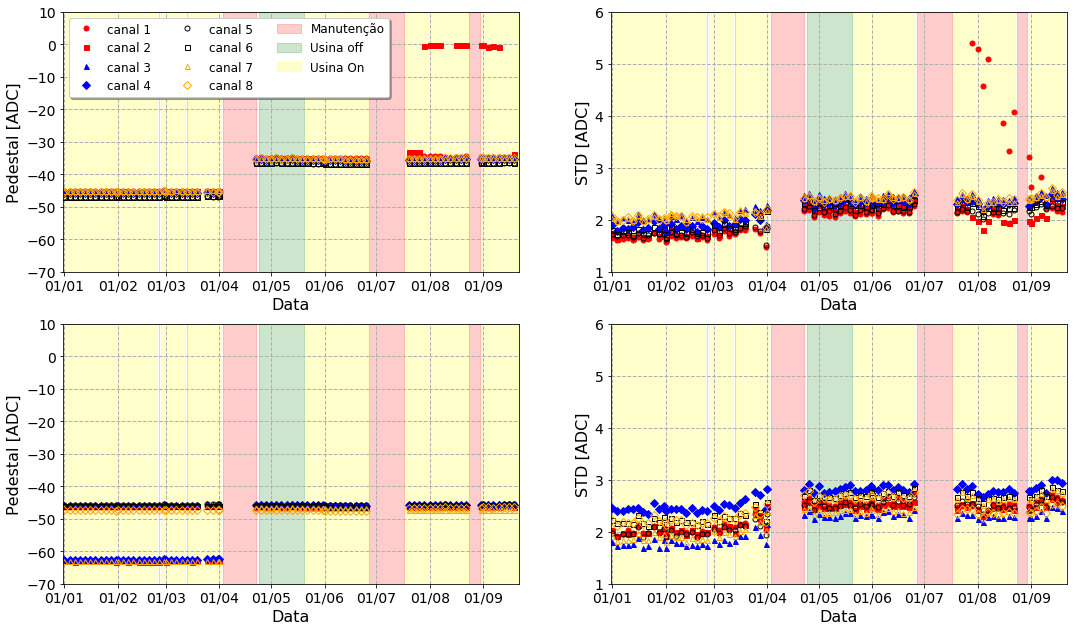

In [10]:
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)
plt.figure(figsize=(18,22))
for i in range(2,4):
       # print(i)
        plt.subplot(4,2,1 + i*2)
        plt.fill_between(np.arange(df.shape[0]),-70, 10,df['Funcionamento'] == 'Manutenção', color = 'red', alpha = 0.2, label = 'Manutenção') 
        plt.fill_between(np.arange(df.shape[0]),-70, 10,df['Funcionamento'] == 'Usina off', color = 'green', alpha = 0.2, label = 'Usina off') 
        plt.fill_between(np.arange(df.shape[0]),-70, 10,df['Funcionamento'] == 'On', color = 'yellow', alpha = 0.2, label = 'Usina On') 

        plt.plot(df[col_b[0 + 8*i]],marker='o',markersize=5,color = 'red',linestyle = 'none',label = 'canal 1')
        plt.plot(df[col_b[1 + 8*i]],marker='s', markersize=5,color = 'red',linestyle = 'none',label = 'canal 2')
        plt.plot(df[col_b[2 + 8*i]],marker='^', markersize=5,color = 'blue',linestyle = 'none',label = 'canal 3')
        plt.plot(df[col_b[3 + 8*i]],marker='D', markersize=5,color = 'blue',linestyle = 'none',label = 'canal 4')
        plt.plot(df[col_b[4 + 8*i]],marker='o', markersize=5,markerfacecolor='none',color = 'black',linestyle = 'none',label = 'canal 5')
        plt.plot(df[col_b[5 + 8*i]],marker='s',markersize=5,markerfacecolor='none',color = 'black',linestyle = 'none',label = 'canal 6')
        plt.plot(df[col_b[6 + 8*i]],marker='^',markersize=5,markerfacecolor='none',color = 'orange',linestyle = 'none',label = 'canal 7')
        plt.plot(df[col_b[7 + 8*i]],marker='D', markersize=5,markerfacecolor='none',color = 'orange',linestyle = 'none',label = 'canal 8')

        ax = plt.gca()
        ax.set_xticks(x_data)
        plt.xlim(-1,len(df[col_a[0]]))
        plt.ylim(-70,10)
        ax.set_xticklabels(['01/01','01/02','01/03', '01/04','01/05','01/06','01/07','01/08','01/09'])
        plt.grid(linestyle='--', linewidth=1)
        if i == 2:
            plt.legend(loc="upper left", bbox_to_anchor=[0, 1],ncol=3, shadow=True, fancybox=True, fontsize = 12)
        plt.ylabel('Pedestal [ADC]', size=16)
        plt.xlabel('Data', size=16)

        
        plt.subplot(4,2,2 + i*2)
        plt.fill_between(np.arange(df.shape[0]), 1, 6,df['Funcionamento'] == 'Manutenção', color = 'red', alpha = 0.2, label = 'Manutenção') 
        plt.fill_between(np.arange(df.shape[0]), 1, 6,df['Funcionamento'] == 'Usina off', color = 'green', alpha = 0.2, label = 'Usina off') 
        plt.fill_between(np.arange(df.shape[0]), 1, 6,df['Funcionamento'] == 'On', color = 'yellow', alpha = 0.2, label = 'Usina On') 

        plt.plot(df[col_bs[0 + 8*i]],marker='o',markersize=5,color = 'red',linestyle = 'none',label = 'canal 1')
        plt.plot(df[col_bs[1 + 8*i]],marker='s', markersize=5,color = 'red',linestyle = 'none',label = 'canal 2')
        plt.plot(df[col_bs[2 + 8*i]],marker='^', markersize=5,color = 'blue',linestyle = 'none',label = 'canal 3')
        plt.plot(df[col_bs[3 + 8*i]],marker='D', markersize=5,color = 'blue',linestyle = 'none',label = 'canal 4')
        plt.plot(df[col_bs[4 + 8*i]],marker='o', markersize=5,markerfacecolor='none',color = 'black',linestyle = 'none',label = 'canal 5')
        plt.plot(df[col_bs[5 + 8*i]],marker='s',markersize=5,markerfacecolor='none',color = 'black',linestyle = 'none',label = 'canal 6')
        plt.plot(df[col_bs[6 + 8*i]],marker='^',markersize=5,markerfacecolor='none',color = 'orange',linestyle = 'none',label = 'canal 7')
        plt.plot(df[col_bs[7 + 8*i]],marker='D', markersize=5,markerfacecolor='none',color = 'orange',linestyle = 'none',label = 'canal 8')

        ax = plt.gca()
        ax.set_xticks(x_data)
        plt.xlim(-1,len(df[col_a[0]]))
        plt.ylim(1,6)
        ax.set_xticklabels(['01/01','01/02','01/03', '01/04','01/05','01/06','01/07','01/08','01/09'])
        plt.grid(linestyle='--', linewidth=1)
        plt.ylabel('STD [ADC]', size=16)
        plt.xlabel('Data', size=16)

        #plt.show()